In [95]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Sydney Airport TEMP.csv")
print(df.isna().sum())
df.head()

Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
dtype: int64


,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality
0,IDCJAC0002,66037,1939,4,22.6,Y
1,IDCJAC0002,66037,1939,5,20.6,Y
2,IDCJAC0002,66037,1939,6,17.5,Y
3,IDCJAC0002,66037,1939,7,15.3,Y
4,IDCJAC0002,66037,1939,8,18.5,Y


In [96]:
df['date'] = pd.to_datetime(dict(year=df.Year, month=df.Month, day=1))

<Axes: xlabel='date'>

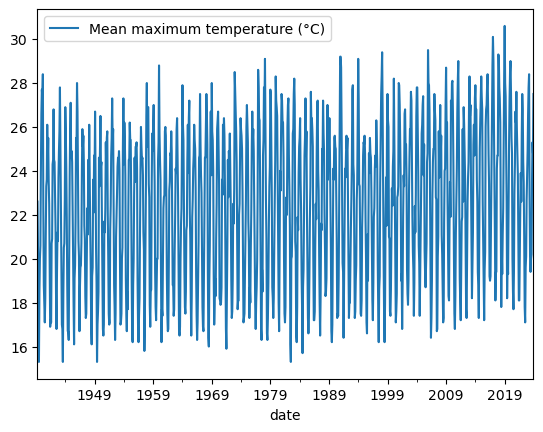

In [62]:
df.plot(x="date", y="Mean maximum temperature (°C)")

<Axes: xlabel='date'>

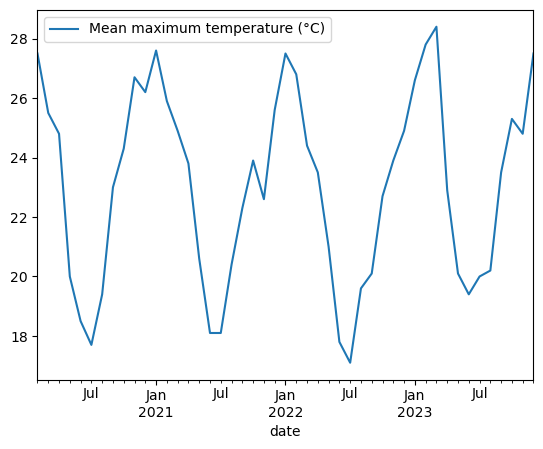

In [63]:
df.query("date > '2020-01-01'").plot(x="date", y="Mean maximum temperature (°C)")

In [64]:
# Summary statistics of numerical columns
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Bureau of Meteorology station number         Year        Month  \
count                                1017.0  1017.000000  1017.000000   
mean                                66037.0  1981.123894     6.513274   
min                                 66037.0  1939.000000     1.000000   
25%                                 66037.0  1960.000000     4.000000   
50%                                 66037.0  1981.000000     7.000000   
75%                                 66037.0  2002.000000    10.000000   
max                                 66037.0  2023.000000    12.000000   
std                                     0.0    24.477460     3.449876   

       Mean maximum temperature (°C)                           date  
count                    1017.000000                           1017  
mean                       22.394592  1981-07-31 23:38:45.663716800  
min                        15.300000            1939-04-01 00:00:00  
25%                        19.300000     

In [8]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Product code                            0
Bureau of Meteorology station number    0
Year                                    0
Month                                   0
Mean maximum temperature (°C)           0
Quality                                 0
date                                    0
dtype: int64


In [9]:
# Data types of columns
print("\nData Types:")
print(df.dtypes)



Data Types:
Product code                                    object
Bureau of Meteorology station number             int64
Year                                             int64
Month                                            int64
Mean maximum temperature (°C)                  float64
Quality                                         object
date                                    datetime64[ns]
dtype: object


/Users/thekkedath/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


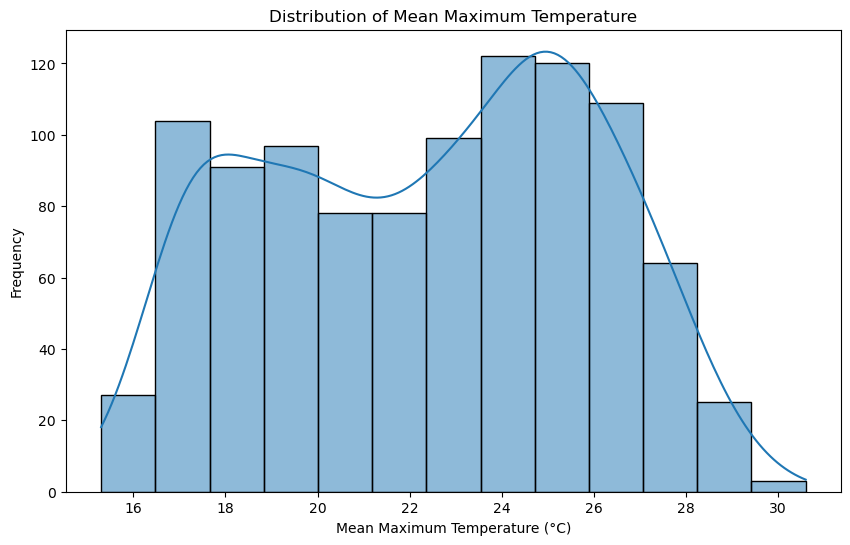

In [10]:
# Visualize the distribution of 'Mean maximum temperature (°C)'
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['Mean maximum temperature (°C)'], kde=True)
plt.title('Distribution of Mean Maximum Temperature')
plt.xlabel('Mean Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

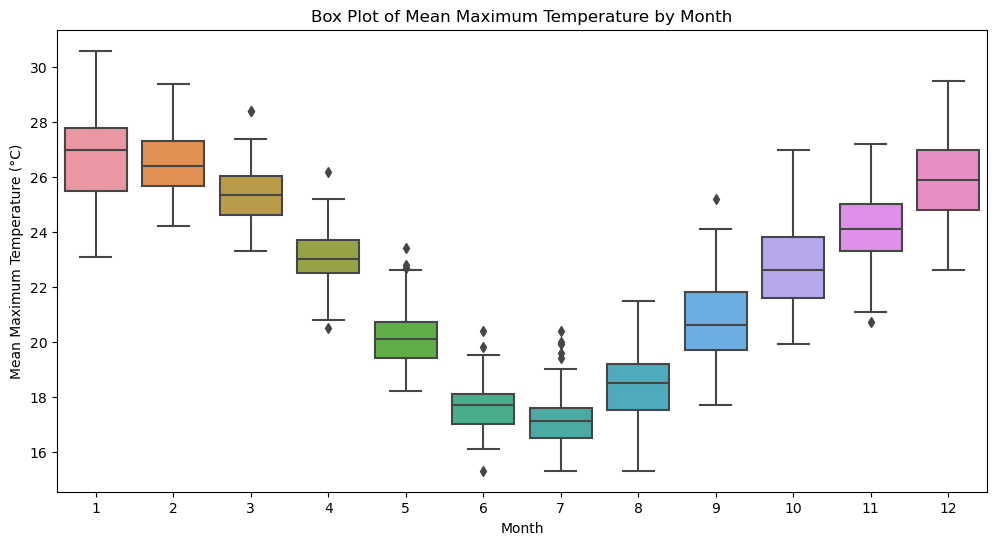

In [11]:
# Box plot of 'Mean maximum temperature (°C)' by 'Month'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Mean maximum temperature (°C)', data=df)
plt.title('Box Plot of Mean Maximum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Maximum Temperature (°C)')
plt.show()

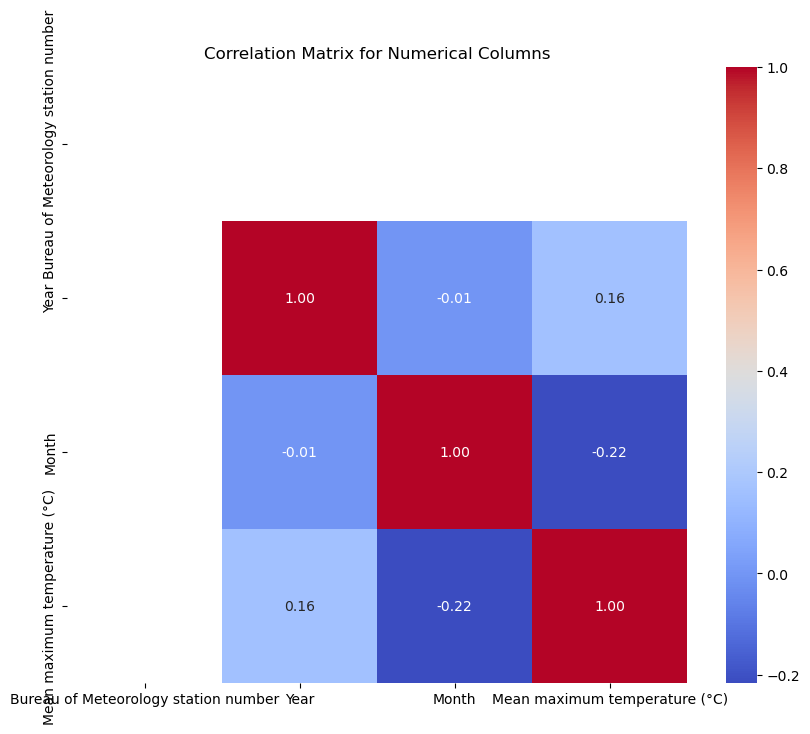

In [13]:
# Correlation matrix for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

Feature Engineering

In [97]:
df["month"] = df["date"].dt.month

In [98]:
df["quarter"] = df["date"].dt.quarter

In [99]:
df["day_of_week"] = df["date"].dt.dayofweek

In [100]:
df.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,date,month,quarter,day_of_week
0,IDCJAC0002,66037,1939,4,22.6,Y,1939-04-01,4,2,5
1,IDCJAC0002,66037,1939,5,20.6,Y,1939-05-01,5,2,0
2,IDCJAC0002,66037,1939,6,17.5,Y,1939-06-01,6,2,3
3,IDCJAC0002,66037,1939,7,15.3,Y,1939-07-01,7,3,5
4,IDCJAC0002,66037,1939,8,18.5,Y,1939-08-01,8,3,1


Training data - all data will 2019 - Testing data all data from 2020 onwards

In [69]:
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)

(969, 10)
(48, 10)


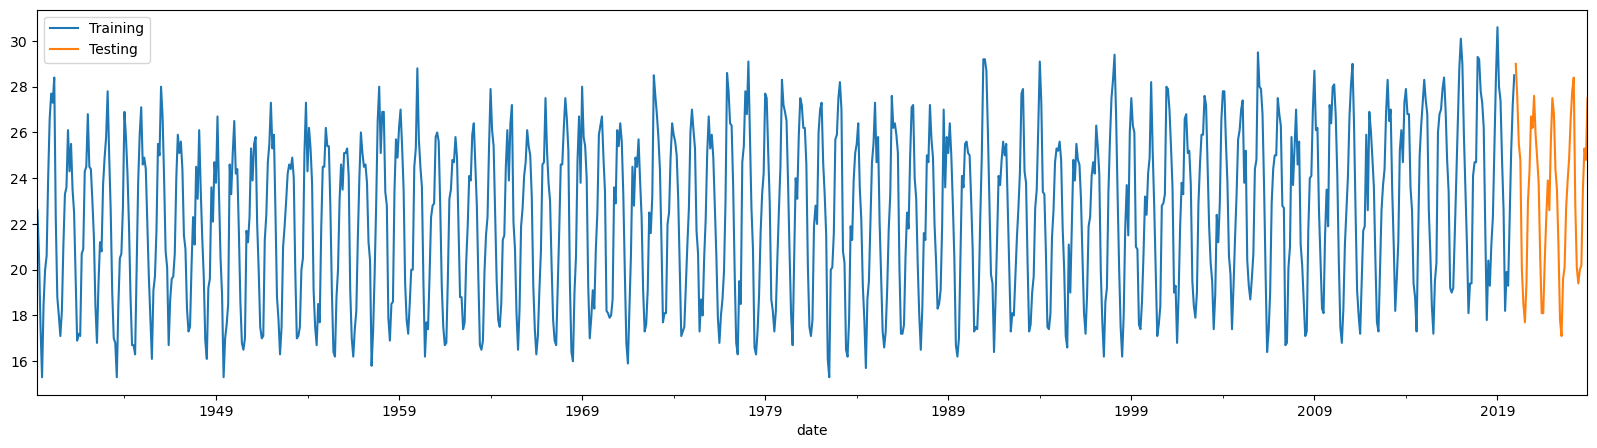

In [70]:
figure, ax = plt.subplots(figsize=(20, 5))
training_data.plot(ax=ax, label="Training", x="date", y="Mean maximum temperature (°C)")
testing_data.plot(ax=ax, label="Testing", x="date", y="Mean maximum temperature (°C)")
plt.show()

Splitting Training and Test Data

In [71]:
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

In [72]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,\
  mean_squared_error, r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"MSE: {mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  r2 = r2_score(y_test, prediction)
  print(f"R-squared (r2) value: {r2}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  figure, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

In [73]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=4, test_size=100),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impo...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 6, 5, 10],
                         'n_estimators': [100, 300, 500, 700, 900, 1000]})

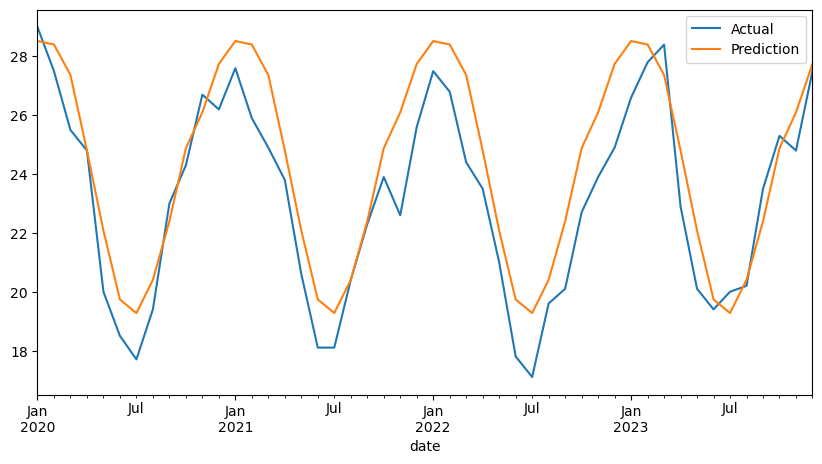

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [74]:
# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [75]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()

parameters = {
    "max_depth": [3, 4, 6, 8, 10],
    "learning_rate": [0.001, 0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500, 2000],
    "colsample_bytree": [0.3, 0.5, 0.7],
    "reg_alpha": [0, 0.001, 0.01, 0.1],
    "reg_lambda": [0, 0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

KeyboardInterrupt: 

In [77]:
from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()

parameters = {
    "max_depth": [3, 5, 8],
    "learning_rate": [0.01, 0.1, 0.2],
    "n_estimators": [100, 500, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=model, param_distributions=parameters, n_iter=10, cv=cv_split, scoring='r2')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_


In [78]:
# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

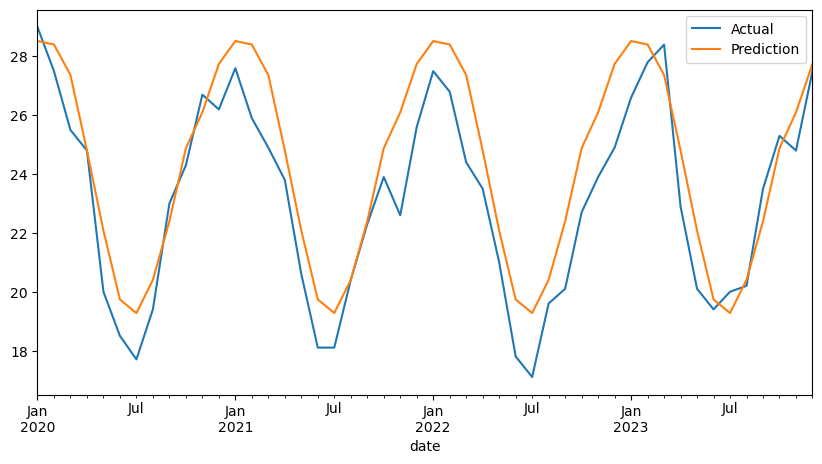

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [79]:
best_params = random_search.best_params_
best_model = XGBRegressor(**best_params)
best_model.fit(X_train, y_train)
prediction = best_model.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

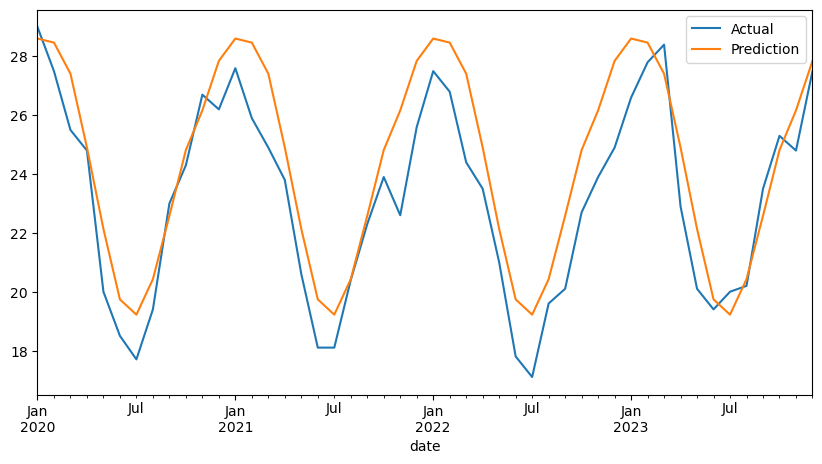

MAE: 1.377886406580607
MSE: 2.604357271107098
MAPE: 0.061090611880109384
R-squared (r2) value: 0.7607385002340303


In [80]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [4, 5, 6, 7, 15],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)
# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

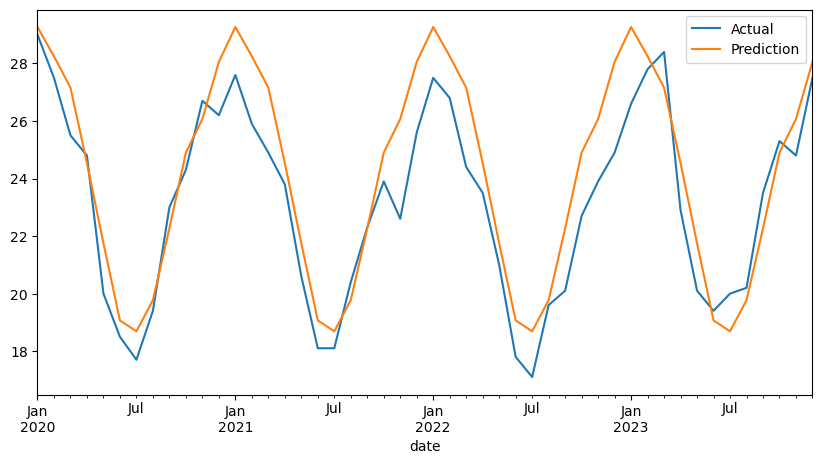

MAE: 1.2786213715871173
MSE: 2.3188983046407516
MAPE: 0.05535809625514648
R-squared (r2) value: 0.7869635274974165


In [82]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [4, 5, 6, 7, 15],
    "learning_rate": [0.01, 0.05, 0.1],
    "n_estimators": [500, 1000, 1500],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)
# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [113]:
def create_lag_features(df1, lags=1):
  y = df.loc[:, "Mean maximum temperature (°C)"]
  for lag in range(lags):
    df1[f"lag_{lag + 1}"] = y.shift(lag + 1)
  return df1

df = create_lag_features(df, lags=6)

In [114]:
training_mask = df["date"] < "2020-01-1"
training_data = df.loc[training_mask]
print(training_data.shape)

testing_mask = df["date"] >= "2020-01-1"
testing_data = df.loc[testing_mask]
print(testing_data.shape)
training_data = training_data.drop(columns=["date"])
testing_dates = testing_data["date"]
testing_data = testing_data.drop(columns=["date"])

X_train = training_data[[ "month", "quarter", "Year"]]
y_train = training_data["Mean maximum temperature (°C)"]

X_test = testing_data[["month", "quarter", "Year"]]
y_test = testing_data["Mean maximum temperature (°C)"]

(969, 16)
(48, 16)


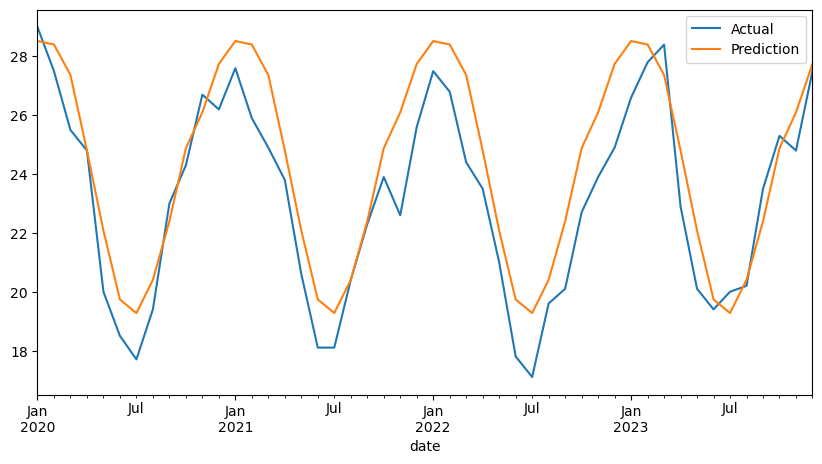

MAE: 1.3450289090474445
MSE: 2.487952871904017
MAPE: 0.059734268787447774
R-squared (r2) value: 0.7714325365099544


In [116]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=4, test_size=100)
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)

In [115]:
training_data.head()

,Product code,Bureau of Meteorology station number,Year,Month,Mean maximum temperature (°C),Quality,month,quarter,day_of_week,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6
0,IDCJAC0002,66037,1939,4,22.6,Y,4,2,5,NaN,NaN,NaN,NaN,NaN,NaN
1,IDCJAC0002,66037,1939,5,20.6,Y,5,2,0,22.6,NaN,NaN,NaN,NaN,NaN
2,IDCJAC0002,66037,1939,6,17.5,Y,6,2,3,20.6,22.6,NaN,NaN,NaN,NaN
3,IDCJAC0002,66037,1939,7,15.3,Y,7,3,5,17.5,20.6,22.6,NaN,NaN,NaN
4,IDCJAC0002,66037,1939,8,18.5,Y,8,3,1,15.3,17.5,20.6,22.6,NaN,NaN
